In [38]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

1. COLLECT THE DATA

In [6]:
url = 'https://raw.githubusercontent.com/LinkedInLearning/machine-learning-with-python-logistic-regression-3211129/refs/heads/03_01/src/loan.csv'

In [9]:
loan = pd.read_csv(url)

In [10]:
loan.head()

,Income,Loan Amount,Default
0,30,8,No
1,22,10,No
2,33,12,No
3,28,20,No
4,23,32,No


2. EXPLORE THE DATA

Predictors or independent vars (X1, X2): 'Income' and 'Loan Amount' columns. 
Response or dependent variable(Y): 'Default' column

In this exercise we will use this loan data to train a Logistic regression model (LRM) to predict whether the borrower will default or not default on a new loan based on their income and amount of money they intend to borrow.

1) Let's try to understand our data:
Concise summary of the structure of the data by calling info() method

In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


By looking at the RangeIndex value from the summary, we can tell that there are 30 rows (or instances) in the dataset.
'Default' column holds 'text' which listed as 'object', while 'Income' and 'Loan Amount' columns hold integer values 

2) Let's get summary statistics for the numeric features by calling 'describe()' method of the dataframe

In [12]:
loan.describe()

,Income,Loan Amount
count,30.000000,30.000000
mean,20.966667,54.233333
std,6.195011,28.231412
min,12.000000,8.000000
25%,16.250000,32.000000
50%,20.500000,54.500000
75%,24.750000,71.750000
max,34.000000,110.000000


3) Now that we've described our data structurally and numerically let's describe it visually as well
   We are going to start from some Boxplot
   Before we create the plots we need to import packages: matplotlib and seaborn (first line of the code)
   Let's start by creating a boxplot that highlights the difference in annual income between those that did not default on their loan (NO) and those that did default (YES)
   ax as a object name

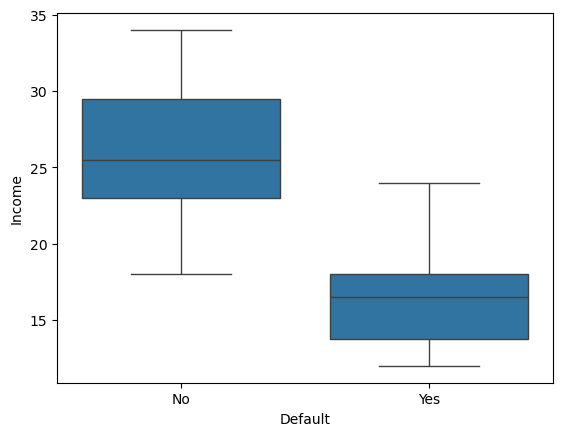

In [14]:
ax = sns.boxplot(data = loan, x = 'Default', y = 'Income')

Those that did not default tend to have a higher annual income than those that did default on their loan.

4) Let's create another boxplot to highlight the difference in amount borrowed between those that did not default and those that did 

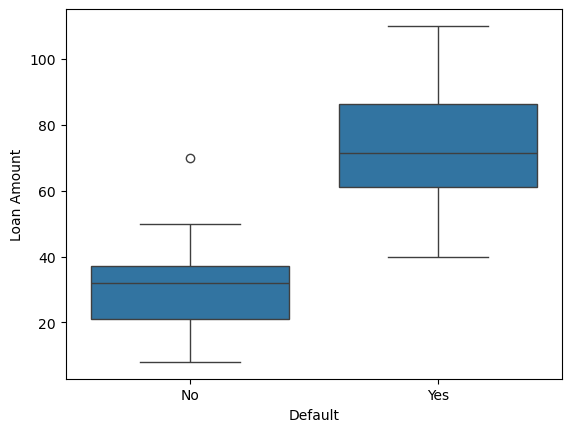

In [15]:
ax = sns.boxplot(data = loan, x = 'Default', y = 'Loan Amount')

Chart shows that those that defaulted tend to have borrowed more money than those that did not default

5) Next let's look to some Scatterplot to see what insight we can derive from it
If we record Default feature values No & YES as 0 & 1 we can use scatterplot to get a slightly different perspective to our data
we need to import numpy package
Now we create a scatterplot that describes the relationship between annual income of borrowers and loan outcomes: y is recoded, s is a size of the point

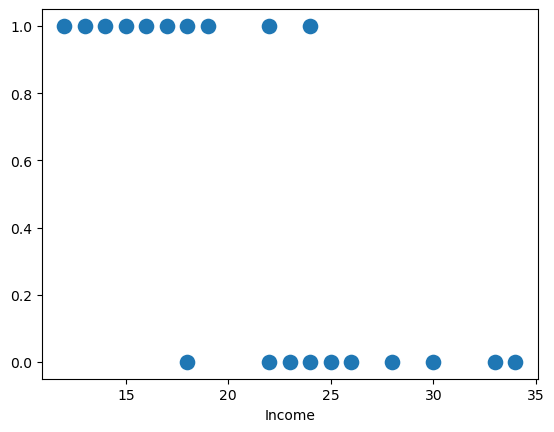

In [20]:
ax = sns.scatterplot(x = loan['Income'], y = np.where(loan['Default']=='No', 0, 1), s = 150)

6) We can describe the relationship between amount borrowed and loan outcomes 

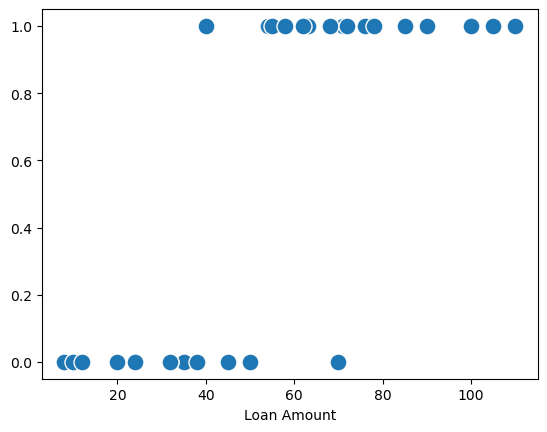

In [21]:
ax = sns.scatterplot(x = loan['Loan Amount'], y = np.where(loan['Default']=='No', 0, 1), s = 150)

Looking at these two charts we can imagine a sigmoid curve that fits the data. It tells us that Logistic regression function would model relationship between predictors and the response.

3. PREPARE THE DATA

6) Split the data into training and test sets: training set wil be used to train the model, test set to evaluate the model
- Before we split the data we need to separate dependent variable from the independent variables.
- Let's start by creating Pandas Series called 'y' for dependent var
- Then we create a pandas DataFrame called 'X' for independent vars

In [27]:
y = loan['Default'] #pandas Series w one [...]

In [26]:
X = loan[['Income', 'Loan Amount']] #pandas DataFrame w 2 square brackets [[...]]

7) Import train_test_split() function from sklearn.model_selection subpackage # 1st line
   - Using train_test_split() we can split X and y into X_train, X_test, y_train, y_test
   - We will set train_size to 0.7 (70% of original data to be assigned to the training set, while 30% to be assigned to the test data)
   - We also set a 'stratify' as 'y', means we want the data split using stratified random sampling approach based on the values of 'y'
   - we will set 'random_state' to 123, so we get the same result every time we do this split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, stratify = y, random_state = 123)

In [ ]:
# We can refer to the shape attribute of any of newly created data sets to know how many instances (or rows, records) are in each. 

In [29]:
X_train.shape

(21, 2)

In [ ]:
#21 rows out of 30 instances in the loan data were assigned to the training set (70%)

In [30]:
X_test.shape # 9 out of 30 is test (30%)

(9, 2)

4. TRAIN AND EVALUATE THE MODEL

We are going to use the LogisticRegression class from sklearn.linear_model subpackage to train our model #1st line

8) We can now instantiate a new object called classifier from the LogisticRegression class

In [32]:
classifier = LogisticRegression()

9) To train the model we pass the training data (X_train and y_train) to the fit() method of the classifier object

In [33]:
model = classifier.fit(X_train, y_train)

10) To predict labels for the test instances, we pass independent variables of the test set (X_test) to the predict() method of the model

In [34]:
model.predict(X_test)

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes'],
      dtype=object)

11) To evaluate how accurate our model is, we pass the test data(X_test, y_test) to the score() method of the model

In [35]:
model.score(X_test, y_test)

0.8888888888888888

(!)The result tells us that our logistic Regression Model is able to corretly predict 8 out of 9, or 89% of the labels in the test sets.

The accuracy of the model only gives us one-dimentional perspective of performance. To get a broader perspective, we need to generate a confusion (or error) matrix of the model's performance.

12) To do it we need to import confusion_matrix() function from the sklearn.metrics subpackage

13) Then we pass the dependent vars from the test sets (which are actual labels y_test) and the model's predicted labels to the confusion_matrix function which is model.predict(X_test)

In [39]:
confusion_matrix(y_test, model.predict(X_test))

array([[3, 1],
       [0, 5]])

The result is 2x2 array thet shows us how many instances the model predicted correctly or incorrectly as ether Yes or No. 
This confusion matrix can be illustrated as follows:
- the 1st row of matrix shows that of the 4 instances that were actually 'NO' the model predicted 3 as 'NO', but 1 as 'YES'
- the 2nd row shows us that from the 5 instances that were actually "YES', the model predicted all 5 correctly as 'YES'

Now we've successfully trained and evaluated the Logistic Regression Model. 

INTERPRET THE MODEL

Now, we've built LRM and evaluated the performance of the model on the test data, we can interpret the model's output. 
Specifically, the model coefficients.

The relationship b/w dependent and independent vars in LRM is generally represented as follows:
 - Logit (or LogOdds) as a linear combination  of the predictors log(p/(1-p))
 - B zero is intercept, B1 to Bn are the coeff of the independent vars X1 to Xn 

14) To get the intercept (or B zero) we refer to the 'intercept_'  attribute of our model

In [40]:
model.intercept_

array([15.4670632])

15) To get the other model coefficients (B1 and B2), we refer to the 'coef_' attribute of our model

In [41]:
model.coef_

array([[-1.0178107 ,  0.14656096]])

The model coefficients correspond to the order in which the independent vars are listed in the training data. 
This means the equation for our LRM can be written as:
log p/(1-p) = 15.4670632 - 1.0178107 x Income + 0.14656096 x Loan Amount

16) To make our coefficients easier to work with, let's convert coef froma two-dimensional array to one-dimensional array and round the values to two decimal places
    - model.coef_[0] #index only first dimension which is 0, round to two decimal

In [42]:
log_odds = np.round(model.coef_[0], 2)
log_odds

array([-1.02,  0.15])

17) Next, let's create a Pandas DataFrame using a coef values and the column names from the training data as row indexes

In [43]:
pd.DataFrame({'log odds' : log_odds}, index = X.columns)

,log odds
Income,-1.02
Loan Amount,0.15


The first coefficient tells us that, when all other variables are held constant, a 1$ increases in borrower Income decreases the Log Odds that they will default on their loan by 1.02.

Likewise, the second coef tells us that 1s increases in loan Amount (customer borrows), increases the Log odds that they will default on their loan by 0.15 when all other values are held constant.

Understandably, interpreting the coefficients in terms of log odds is a bit confusing. 
A more intuitive approach would be to look at them in terms of Odds. 

18) Let's exponentiate (np.exp) the coeffs so we can interpret them in terms of odds rather than log Odds

In [45]:
odds = np.round(np.exp(log_odds), 2)
pd.DataFrame({'odds': odds}, index = X.columns) # to create a new DF

,odds
Income,0.36
Loan Amount,1.16


The 1st coefficient tells us that for every 1$ increase in a borrower's income, the odd that they will Default on loan reduces by 64% (1-0.36) when all other vars held constant. Earning more money decreases the odds of Default.

The 2nd coef tells us that, assuming all other vars held constant, for every 1$ increase in the amount borrowed, the Odds that a borrower will default increases by 16% (1.16-1) or borrower will default on their loan increases by a factor of 1.16. Borrowing more money increases the Odds of default. 